In [7]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Read in the data
df = pd.read_csv(r'C:\Users\mohms\movies.csv')


In [20]:
# View first 10 rows of data
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0,1980
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0,1980
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0,1980
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0,1981
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0,1980


In [67]:
# Identify missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%
yearcorrect - 0%


In [27]:
# Data Types for our columns

print(df.dtypes)

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           int64
gross          float64
company         object
runtime        float64
yearcorrect     object
dtype: object


In [26]:
# Change Budget data type from float to int

df['budget'] = df['budget'].astype('int64')

In [68]:
# Change Gross data type from float to int

df['gross'] = df['gross'].astype('int64')

In [69]:
# Create correct year column
df['yearcorrect'] = df['released'].astype(str).str.split(', ').str[-1].astype(str).str[:4]

In [70]:
# Sort movies based on gross revenue
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [71]:
#Drop rows with null data
df = df.dropna(how='any',axis=0) 

In [72]:
# Eases navigation 
pd.set_option('display.max_rows', None)

In [74]:
#Factors to consider
#Budget high correlation
#company high correlation

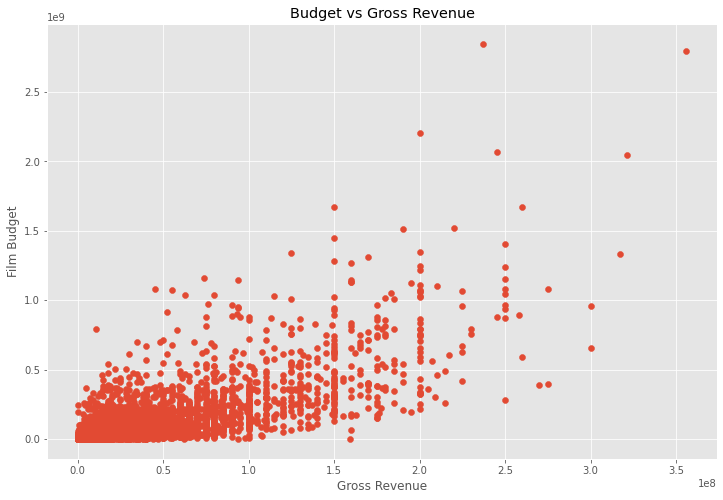

In [75]:
# Scatter plot with budget vs gross 

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Film Budget')

plt.show()


In [76]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,527
7445,Avengers: Endgame,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,137
3045,Titanic,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,534
6663,Star Wars: Episode VII - The Force Awakens,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,529
7244,Avengers: Infinity War,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,145


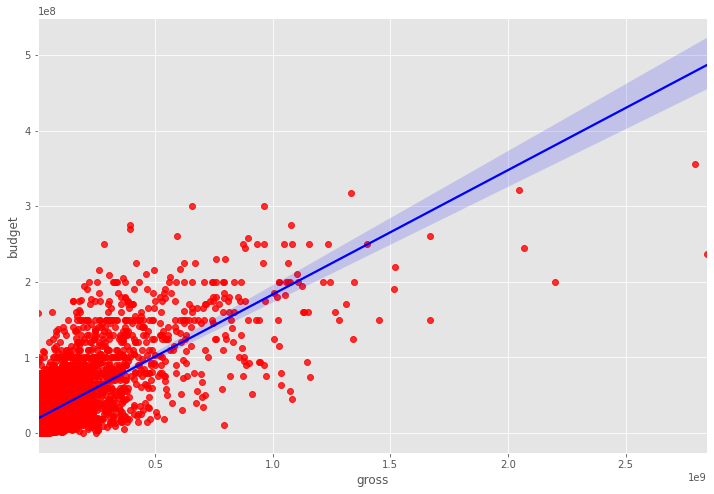

In [77]:
# Plot Budget vs gross using seaborn (linear fit)

sns.regplot(x='gross',y='budget',data=df,scatter_kws={"color":"red"}, line_kws={"color":"blue"} )

In [78]:
# Identify correlations in the data (numerical fields only)
df.corr(method='pearson') # Method = Pearson

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
rating,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792
genre,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237
year,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077
released,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975
score,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068
votes,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303
director,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433
writer,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561
star,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108
country,0.008230,-0.009164,-0.066748,-0.017228,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477


In [79]:
df.corr(method ='kendall') # Method = kendall

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
rating,1.000000,0.137396,-0.015490,0.023547,0.067313,-0.008994,0.005950,0.001735,0.014913,-0.010547,-0.208389,-0.198863,-0.085192,0.085752
genre,0.137396,1.000000,-0.058976,0.016088,0.045217,-0.133391,-0.005585,0.011042,0.002258,-0.012696,-0.275983,-0.194758,-0.058439,-0.027544
year,-0.015490,-0.058976,1.000000,-0.001054,0.039389,0.296512,-0.025293,-0.018691,-0.022272,-0.057292,0.220833,0.239539,-0.005479,0.064824
released,0.023547,0.016088,-0.001054,1.000000,0.028223,0.005205,0.001886,0.005302,0.010118,-0.016524,-0.000030,-0.016133,0.001654,0.011363
score,0.067313,0.045217,0.039389,0.028223,1.000000,0.350185,0.009176,0.009058,0.004414,-0.100231,-0.006406,0.124943,0.009638,0.292254
votes,-0.008994,-0.133391,0.296512,0.005205,0.350185,1.000000,-0.001118,-0.001109,-0.007741,0.008577,0.346274,0.553625,0.107685,0.205344
director,0.005950,-0.005585,-0.025293,0.001886,0.009176,-0.001118,1.000000,0.196884,0.024300,-0.005956,-0.002787,-0.008633,-0.006430,0.002368
writer,0.001735,0.011042,-0.018691,0.005302,0.009058,-0.001109,0.196884,1.000000,0.012601,0.015240,-0.014799,-0.009785,-0.002661,-0.021512
star,0.014913,0.002258,-0.022272,0.010118,0.004414,-0.007741,0.024300,0.012601,1.000000,-0.009260,-0.011155,-0.006465,0.007730,0.001750
country,-0.010547,-0.012696,-0.057292,-0.016524,-0.100231,0.008577,-0.005956,0.015240,-0.009260,1.000000,0.055614,0.085990,0.045134,-0.062574


In [80]:
df.corr(method ='spearman') # Method = spearman

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
rating,1.000000,0.167778,-0.018206,0.031301,0.085237,-0.011871,0.007809,0.002124,0.019408,-0.011824,-0.267486,-0.256014,-0.108557,0.110151
genre,0.167778,1.000000,-0.080105,0.022254,0.061615,-0.182682,-0.007466,0.015393,0.003449,-0.015225,-0.372729,-0.268314,-0.080808,-0.040119
year,-0.018206,-0.080105,1.000000,-0.002404,0.057741,0.427623,-0.037591,-0.027646,-0.032760,-0.072272,0.312886,0.351045,-0.008798,0.095444
released,0.031301,0.022254,-0.002404,1.000000,0.042145,0.006280,0.002797,0.007941,0.015392,-0.021012,-0.000495,-0.027079,0.002086,0.017166
score,0.085237,0.061615,0.057741,0.042145,1.000000,0.495409,0.013366,0.013441,0.006735,-0.124916,-0.009971,0.183192,0.013694,0.412155
votes,-0.011871,-0.182682,0.427623,0.006280,0.495409,1.000000,-0.001819,-0.001398,-0.011716,0.010930,0.493461,0.745793,0.159554,0.300621
director,0.007809,-0.007466,-0.037591,0.002797,0.013366,-0.001819,1.000000,0.262486,0.036264,-0.007505,-0.003890,-0.012746,-0.009778,0.003444
writer,0.002124,0.015393,-0.027646,0.007941,0.013441,-0.001398,0.262486,1.000000,0.018573,0.019264,-0.021810,-0.014593,-0.004120,-0.032161
star,0.019408,0.003449,-0.032760,0.015392,0.006735,-0.011716,0.036264,0.018573,1.000000,-0.011795,-0.016657,-0.009461,0.011481,0.002635
country,-0.011824,-0.015225,-0.072272,-0.021012,-0.124916,0.010930,-0.007505,0.019264,-0.011795,1.000000,0.070208,0.109796,0.056917,-0.078532


In [81]:
# High correltation between budget and gross

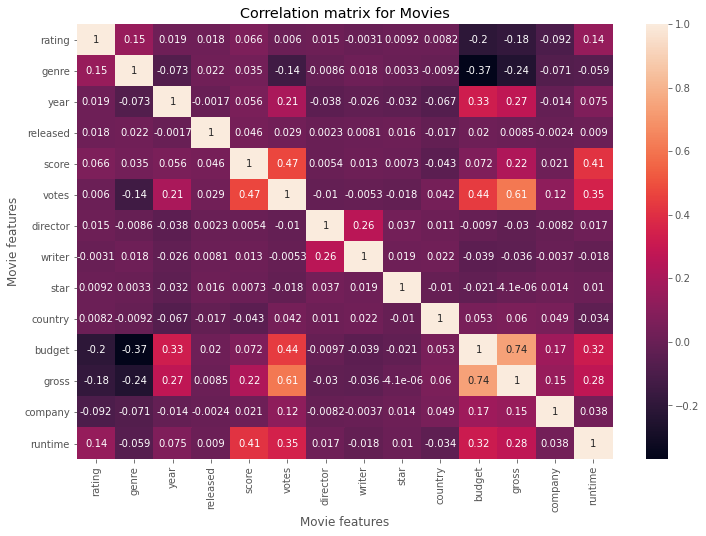

In [82]:
# Correlation Matrix (Pearson)
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.show()

In [83]:
df_numerized = df 

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] =  df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2036
7445,Avengers: Endgame,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,413
3045,Titanic,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,2044
6663,Star Wars: Episode VII - The Force Awakens,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2038
7244,Avengers: Infinity War,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,502


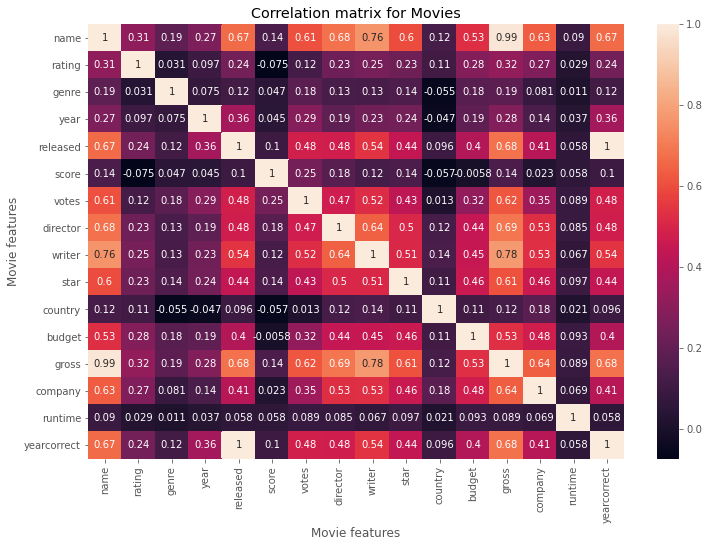

In [84]:
# Correlation Matrix (Pearson)
correlation_matrix = df_numerized.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.show()

In [85]:
#identify correlation per cateogry
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head()

rating  rating      1.000000
        genre       0.147796
        year        0.019499
        released    0.018083
        score       0.065983
dtype: float64

In [86]:
# Identify correlations in descending order

sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head()

genre        budget        -0.368523
budget       genre         -0.368523
yearcorrect  released      -0.263073
released     yearcorrect   -0.263073
genre        gross         -0.244101
dtype: float64

In [87]:
# Identify highest correlations
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes        gross          0.614751
gross        votes          0.614751
             budget         0.740247
budget       gross          0.740247
rating       rating         1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Vote and Budget have the highest correlation to movie gross